### KNN neighbors 

In [17]:
import pandas as pd
import numpy as np
cols = ['user_id','movie_id','rating']
df = pd.read_csv('C:/Users/Drosxo/u.data.txt',sep='\t',names=cols,usecols=range(3))

In [18]:
df.head()

,user_id,movie_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [19]:
movie_properties = df.groupby('movie_id').agg({'rating':[np.size,np.mean]})
movie_properties.head()

rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [25]:
movieNumRatings = pd.DataFrame(movie_properties['rating']['size'])
movieNumRatings.head()

,size
movie_id,
1,452
2,131
3,90
4,209
5,86


In [26]:
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
movieNormalizedNumRatings.head()

,size
movie_id,
1,0.773585
2,0.222985
3,0.152659
4,0.356775
5,0.145798


In [58]:
#Each entry will contain the movie name, list of genre values, 
#the normalized popularity score, and the average rating for each movie:

movieDict = {}
with open('C:/Users/Drosxo/u.item.txt') as f:
    temp = ''
    for line in f:
        #line.decode("ISO-8859-1")
        fields = line.rstrip('\n').split('|') #rstrip removes any white spaces at the end of the string 
                                              #Split a string into a list where each word is a list item
        movieID = int(fields[0])
        name = fields[1]
        date = fields[2]
        imdb_url = fields[4]
        genres = fields[5:25]
        genres = map(int, genres)
        movieDict[movieID] = (name, np.array(list(genres)),
                              movieNormalizedNumRatings.loc[movieID].get('size'),
                                  movie_properties.loc[movieID].rating.get('mean'))

In [59]:
print(movieDict[33])

('Desperado (1995)', array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]), 0.1646655231560892, 3.4536082474226806)


In [60]:
#function that computes the "distance" between two movies based on how similar their genres are, and how similar their popularity is. 
from scipy import spatial

def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance
    
ComputeDistance(movieDict[5], movieDict[4])

0.877644368210406

In [80]:
import operator

def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict:
        if (movie != movieID):
            dist = ComputeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

K = 20
avgRating = 0
neighbors = getNeighbors(5, K)
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print (movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))
    
avgRating /= K



Once Upon a Time in America (1984) 3.4
Desperate Measures (1998) 3.3333333333333335
Kiss the Girls (1997) 3.4615384615384617
Desperate Measures (1998) 3.2962962962962963
Kiss of Death (1995) 2.85
Amateur (1994) 3.1666666666666665
Guilty as Sin (1993) 2.1666666666666665
Juror, The (1996) 2.817073170731707
Dolores Claiborne (1994) 3.3417721518987342
City Hall (1996) 3.1392405063291138
Bound (1996) 3.8217054263565893
Diabolique (1996) 2.887323943661972
Extreme Measures (1996) 3.171875
Murder in the First (1995) 3.6
Kalifornia (1993) 3.2203389830508473
Last Supper, The (1995) 3.4482758620689653
Red Corner (1997) 3.3859649122807016
Carlito's Way (1993) 3.4074074074074074
Professional, The (1994) 3.704697986577181
Bonnie and Clyde (1967) 3.819672131147541


In [81]:
avgRating

3.271992445300609

In [82]:
movieDict[5]

('Copycat (1995)',
 array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 0.1457975986277873,
 3.302325581395349)

### Principal Component Analysis PCA

In [83]:
#PCA is a dimensionality reduction technique; it lets you distill multi-dimensional data down to fewer dimensions, 
#selecting new dimensions that preserve variance in the data as best it can.

In [84]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

In [86]:
iris=load_iris()


In [90]:
iris.data.shape

(150, 4)

In [92]:
num_samples,num_features = iris.data.shape
print(list(iris.target_names))

['setosa', 'versicolor', 'virginica']


In [97]:
target = iris.target_names
print(target)

['setosa' 'versicolor' 'virginica']


In [104]:
X = iris.data
pca = PCA(n_components=1, whiten=True).fit(X)
X_pca = pca.transform(X)

In [105]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]]


In [106]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_)) #how much the two components are

[0.92461872]
0.9246187232017272


In [107]:
cycle('rgb')

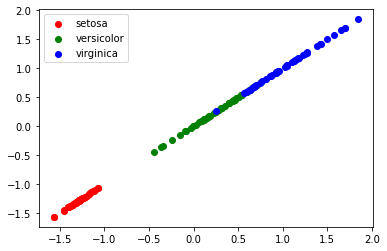

In [109]:
%matplotlib inline
from pylab import *

colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 0],
        c=c, label=label)
pl.legend()
pl.show()

### Data warehousing